##Data description
There are three datasets used in this system: Movies dataset containing the movie and related columns, Credits containing the cast and crew details of corresponding movies and Ratings cotaining the user rating given to a particular movie out of 5.
###tmdb_5000_movies

index - unique key to all the movies.

budget - The budget in which the movie was made.

genre - The genre of the movie, Action, Comedy, Thriller etc.

homepage - A link to the homepage of the movie.

id - This is the movie_id.

keywords - The keywords or tags related to the movie.

original_language - The language in which the movie was made.

original_title - The title of the movie before translation 
or adaptation.

overview - A brief description of the movie.

popularity - A numeric quantity specifying the movie popularity.

production_companies - The production house of the movie.

production_countries - The country in which it was produced.

release_date - The date on which it was released.

revenue - The worldwide revenue generated by the movie.

runtime - The running time of the movie in minutes.

status - "Released" or "Rumored".

tagline - Movie's tagline.

title - Title of the movie.

vote_average - average ratings the movie recieved.

vote_count - the count of votes recieved


###tmdb_5000_credits

movie_id - A unique identifier for each movie.

cast - The name of lead and supporting actors.

crew - The name of Director, Editor, Composer, Writer etc.


###ratings_small

user_id - Identifier for each user.

movie_id - A unique identifier for each movie.

rating - Rating given to the movie by a particular user out of 5.

timestamp - timestamp

###Aim
The aim is to apply different recommendation techniques i.e. Content based filtering, Demographic filtering and Collaborative filtering.

In [88]:
from google.colab import files
uploaded = files.upload()

In [89]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",05-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16
1,1,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-09,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
2,2,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-07,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
3,3,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-15,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
4,4,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-12,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106


##EDA

In [91]:
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [92]:
df.shape

(4803, 21)

##Content Based Filtering
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

In [93]:
f = ['original_title', 'popularity']
top_5_movies = df[f]
top_5_movies.sort_values(by=['popularity'], inplace= True, ascending=False)
top_5_movies = top_5_movies[0:5]
top_5_movies

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,original_title,popularity
547,Minions,875.581305
96,Interstellar,724.247784
789,Deadpool,514.569956
95,Guardians of the Galaxy,481.098624
128,Mad Max: Fury Road,434.278564


In [94]:
co = df.corr()
co

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.761065,0.191025,-0.413899,-0.521745,-0.318832,-0.120282,-0.441813
budget,-0.761065,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,0.191025,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,-0.413899,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,-0.521745,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,-0.318832,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,-0.120282,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,-0.441813,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


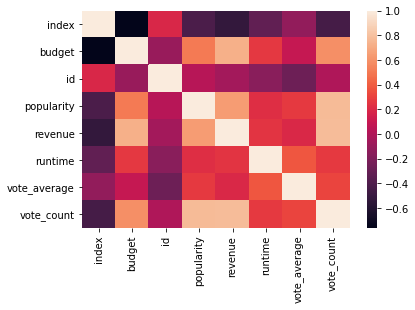

In [95]:
import seaborn as sns
sns.heatmap(co)

In [96]:
df.rename(columns = {'index':'idx'}, inplace = True)
df.head() 

,idx,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",05-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16
1,1,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-09,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
2,2,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-07,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
3,3,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-15,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
4,4,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-12,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106


In [97]:
feat =['idx', 'genres', 'original_language', 'title', 'popularity', 'budget', 'revenue', 'vote_count']
df_copy= df.copy()
df = df[feat]
df.head()

,idx,genres,original_language,title,popularity,budget,revenue,vote_count
0,0,"[{""id"": 99, ""name"": ""Documentary""}]",en,My Date with Drew,1.929883,0,0,16
1,1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,237000000,2787965087,11800
2,2,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,300000000,961000000,4500
3,3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,245000000,880674609,4466
4,4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,250000000,1084939099,9106


In [98]:
df.isnull().values.any()

False

In [99]:
def get_important_features(data):
  important_features =[]
  for i in range(0,data.shape[0]):
    important_features.append(str(data['genres'][i]) + ' ' + str(data['original_language'][i]) + ' ' + str(data['title'][i]) + ' ' + str(data['popularity'][i]) + ' ' + str(data['budget'][i]) + ' ' + str(data['revenue'][i]) + ' ' + str(data['vote_count'][i]))
  return important_features

In [100]:
df['important_features'] = get_important_features(df)
df.head()

,idx,genres,original_language,title,popularity,budget,revenue,vote_count,important_features
0,0,"[{""id"": 99, ""name"": ""Documentary""}]",en,My Date with Drew,1.929883,0,0,16,"[{""id"": 99, ""name"": ""Documentary""}] en My Date..."
1,1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,237000000,2787965087,11800,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
2,2,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,300000000,961000000,4500,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
3,3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,245000000,880674609,4466,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
4,4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,250000000,1084939099,9106,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."


##Cosine similarity
To get a similarity score matrix based on cosine similarity of the column 'important features'.

In [101]:
cm = CountVectorizer().fit_transform(df['important_features'])
cs = cosine_similarity(cm)
print(cs)

[[1.         0.39167473 0.34697712 ... 0.37688918 0.4000988  0.15075567]
 [0.39167473 1.         0.73559745 ... 0.61343466 0.70228664 0.07216878]
 [0.34697712 0.73559745 1.         ... 0.53429671 0.60598271 0.08219949]
 ...
 [0.37688918 0.61343466 0.53429671 ... 1.         0.77407027 0.125     ]
 [0.4000988  0.70228664 0.60598271 ... 0.77407027 1.         0.07372098]
 [0.15075567 0.07216878 0.08219949 ... 0.125      0.07372098 1.        ]]


In [102]:
cs.shape

(4803, 4803)

In [103]:
Title = str(input("Enter the movie title: "))
movie_id = df[df.title == Title]['idx'].values[0]

Enter the movie title: Titanic


In [104]:
scores = list(enumerate(cs[movie_id]))
sorted_scores = sorted(scores, key = lambda x:x[1], reverse=True)
sorted_scores = sorted_scores[1:]
print(sorted_scores)

[(2953, 0.8485552916276634), (2049, 0.8306745218738338), (1203, 0.8242599508051092), (2039, 0.820922069065183), (4191, 0.820922069065183), (1031, 0.8121419014464815), (1648, 0.8121419014464815), (2819, 0.8121419014464815), (3324, 0.8121419014464815), (3701, 0.8121419014464815), (827, 0.8118643582261262), (2018, 0.8118643582261262), (2261, 0.8118643582261262), (1450, 0.8095933132509727), (1312, 0.8064516129032258), (4198, 0.8064516129032258), (661, 0.8058726574577093), (1818, 0.8058726574577093), (3061, 0.8058726574577093), (1524, 0.8051813277436237), (3604, 0.8051813277436237), (1689, 0.8043341376678731), (962, 0.8036375634160796), (1800, 0.8036375634160796), (2204, 0.8036375634160796), (2439, 0.8036375634160796), (2570, 0.8036375634160796), (3735, 0.8036375634160796), (4398, 0.8036375634160796), (1670, 0.8019826548374034), (4458, 0.8004448151580839), (576, 0.8000116876191594), (3135, 0.794996299293326), (3651, 0.794996299293326), (3719, 0.794996299293326), (4526, 0.794996299293326), (

In [105]:
j=0
print("The 5 most recommended movies to", Title, 'are:\n')
for i in sorted_scores:
  movie = df[df.idx == i[0]]['title'].values[0]
  print(j+1, movie)
  j=j+1
  if j>4:
    break

The 5 most recommended movies to Titanic are:

1 O
2 Darling Lili
3 Legal Eagles
4 Summer of Sam
5 May


##Demographic Filtering

In [106]:
df1 = pd.read_csv("tmdb_5000_credits.csv")
df2 = pd.read_csv("tmdb_5000_movies.csv")
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')
df2.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,0,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",05-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."
1,1,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-09,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
2,2,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-07,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
3,3,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-15,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
4,4,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-12,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."


We need a metric to score or rate movie.
Calculate the score for every movie.
Sort the scores and recommend the best rated movie to the users.
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (WR) which is a true Bayesian estimate and is given as :-

    Weighted Rating (WR) = (v/(v+m))*R + (m/(v+m))*C

where,

v is the number of votes for the movie

m is the minimum votes required to be listed in the chart

R is the average rating of the movie

C is the mean vote across the whole report


In [107]:
C= df2['vote_average'].mean()
C

6.092171559442011

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

In [108]:
m= df2['vote_count'].quantile(0.95)
m

3040.8999999999996

In [109]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(241, 24)

We see that there are 241 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [110]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [111]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [112]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 10 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1882,The Shawshank Redemption,8205,8.5,7.848921
66,The Dark Knight,12002,8.2,7.773906
663,Fight Club,9413,8.3,7.760909
97,Inception,13752,8.1,7.736417
3233,Pulp Fiction,8428,8.3,7.714609
96,Interstellar,10867,8.1,7.660997
810,Forrest Gump,7927,8.2,7.615595
3338,The Godfather,5893,8.4,7.614467
330,The Lord of the Rings: The Return of the King,8064,8.1,7.550188
263,The Lord of the Rings: The Fellowship of the Ring,8705,8.0,7.506082


Text(0.5, 1.0, 'Popular Movies')

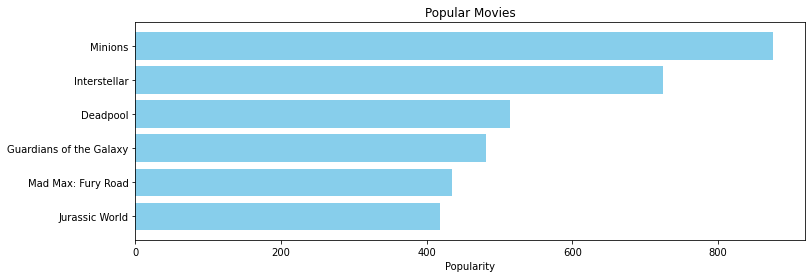

In [113]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Text(0.5, 1.0, 'Popular Movies')

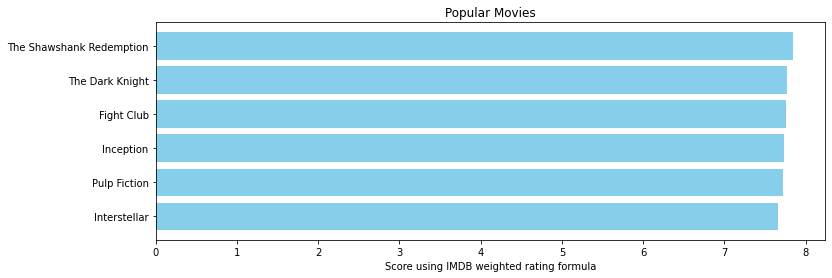

In [114]:
plt.figure(figsize=(12,4))

plt.barh(q_movies['title'].head(6),q_movies['score'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Score using IMDB weighted rating formula")
plt.title("Popular Movies")

From the above two graphs, we can say that if we judge the movie only on the basis of popularity and on the basis of IMDB weighted rating score, the popular movie varies. We do understand the criteria used for IMDB rating is more logical and trustworthy, therefore we can recommend popular movies to any user based on demographic filtering by this process.

The demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user. 


##Collaborative Filtering

In [115]:
!pip install surprise

In [116]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [117]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE'], cv=5)

{'fit_time': (4.569606304168701,
  4.54158878326416,
  4.582385063171387,
  4.814349889755249,
  8.62650203704834),
 'test_rmse': array([0.89000174, 0.90316321, 0.90373314, 0.89503328, 0.89844451]),
 'test_time': (0.14519119262695312,
  0.3234822750091553,
  0.13599634170532227,
  0.5032792091369629,
  0.14611268043518066)}

In [118]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [119]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [131]:
l =[]
x= svd.predict(1, 302, 3)
exp_a = x[3]
tru = x[2]
print("The true rating for movie", df2[df2['id'] == 302]['title'].iloc[0], 'is' , tru)
print("The predicted rating for movie", df2[df2['id'] == 302]['title'].iloc[0], 'is' , exp_a)
l.append(round(exp_a,3))

The true rating for movie Swimming Pool is 3
The predicted rating for movie Swimming Pool is 2.7074879894497346


For movie with ID 302, we get an estimated prediction of 2.707 using RMSE metric.

In [121]:
cross_validate(svd, data, measures=['MSE'], cv=5)

{'fit_time': (4.5955212116241455,
  5.196510076522827,
  5.19010591506958,
  5.182548522949219,
  5.149065971374512),
 'test_mse': array([0.80889036, 0.80946249, 0.78960533, 0.82771919, 0.78571526]),
 'test_time': (0.3072237968444824,
  0.16379880905151367,
  0.1387038230895996,
  0.14435553550720215,
  0.14034557342529297)}

In [122]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [132]:
y= svd.predict(1, 302, 3)
exp_b = y[3]
tru = y[2]
print("The true rating for movie", df2[df2['id'] == 302]['title'].iloc[0], 'is' , tru)
print("The predicted rating for movie", df2[df2['id'] == 302]['title'].iloc[0], 'is' , exp_b)
l.append(round(exp_b,3))

The true rating for movie Swimming Pool is 3
The predicted rating for movie Swimming Pool is 2.7074879894497346


For movie with ID 302, we get an estimated prediction of 2.730 using MSE metric.

In [124]:
cross_validate(svd, data, measures=['MAE'], cv=5)

{'fit_time': (4.526799201965332,
  4.616826295852661,
  4.552245378494263,
  4.61340069770813,
  4.736501693725586),
 'test_mae': array([0.6907806 , 0.69243813, 0.69281348, 0.68865428, 0.68744852]),
 'test_time': (0.2995448112487793,
  0.1378309726715088,
  0.2964775562286377,
  0.14145350456237793,
  0.14143681526184082)}

In [125]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [133]:
y= svd.predict(1, 302, 3)
exp_c = y[3]
tru = y[2]
# print(exp)
# df2[df2['id'] == 302]['title'].iloc[0]
print("The true rating for movie", df2[df2['id'] == 302]['title'].iloc[0], 'is' , tru)
print("The predicted rating for movie", df2[df2['id'] == 302]['title'].iloc[0], 'is' , exp_c)
l.append(round(exp_c,3))

The true rating for movie Swimming Pool is 3
The predicted rating for movie Swimming Pool is 2.7074879894497346


For movie with ID 302, we get an estimated prediction of 2.852 using MAE metric.

In [127]:
cross_validate(svd, data, measures=['FCP'], cv=5)

{'fit_time': (4.661307096481323,
  4.625017166137695,
  4.668245553970337,
  4.615799903869629,
  4.685489654541016),
 'test_fcp': array([0.63418375, 0.62972496, 0.63768293, 0.64344272, 0.64445872]),
 'test_time': (0.14230656623840332,
  0.14883780479431152,
  0.14095377922058105,
  0.1390378475189209,
  0.16099953651428223)}

In [128]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [134]:
y= svd.predict(1, 302, 3)
exp_d = y[3]
tru = y[2]
# print(exp)
# df2[df2['id'] == 302]['title'].iloc[0]
print("The true rating for movie", df2[df2['id'] == 302]['title'].iloc[0], 'is' , tru)
print("The predicted rating for movie", df2[df2['id'] == 302]['title'].iloc[0], 'is' , exp_d)
l.append(round(exp_d,3))

The true rating for movie Swimming Pool is 3
The predicted rating for movie Swimming Pool is 2.7074879894497346


For movie with ID 302, we get an estimated prediction of 2.543 using FCP metric.

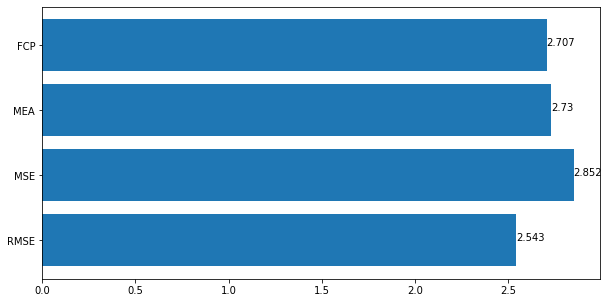

In [130]:
key = ['RMSE','MSE','MEA','FCP']
value = l
fig = plt.figure(figsize = (10, 5)) 
plt.barh(key, value)
for index, v in enumerate(value):
    plt.text(v, index, str(v))


 One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

##Insights gained
1. Content based filtering: The output is the names of movies similar to the input movie. The similarity is judged on the basis of cosine similarity. It depends on the content and type of the movie and not user dependent.

2. Demographic filtering: The output is the names of popular movies based on the IMDB weighted rating. We can observe that movies vary according to the quantile selected and is different from the movies obtained based on 'popularity'.

3. Collaborative filtering: The output is the estimated rating of a particular movie input. The estimation varies depending on the accuracy metrics used. This filtering is user dependent. The best estimation has occured on MSE metric.

##References
[1] https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75

[2] https://www.kaggle.com/rounakbanik/movie-recommender-systems
http://trouvus.com/wp-content/uploads/2016/03/

[3] https://towardsdatascience.com/recommendation-systems-models-and-evaluation-84944a84fb8e
